## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)
y = boston['medv']
X = boston[boston.columns.drop('medv')]

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [133]:
treex = DecisionTreeRegressor(max_depth=11)

treex.fit(X_train, y_train)

MSE_train = treex.score(X_train, y_train)

print("Profundidade x - base treino:  MSE=", MSE_train.round(2))

Profundidade x - base treino:  MSE= 1.0


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [134]:
path = treex.cost_complexity_pruning_path(X_test, y_test)

Text(0, 0.5, 'Impureza das folhas')

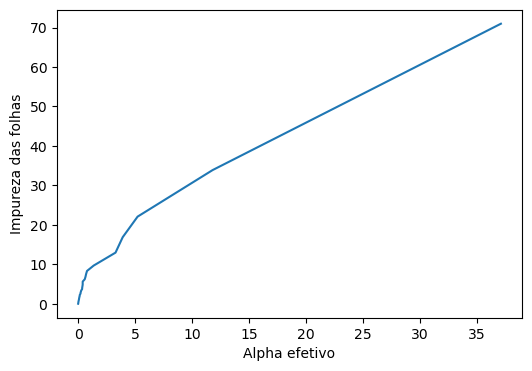

In [135]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(6,4))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [136]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [137]:
msestr = []

for clf in clfs:
     mse = clf.score(X_train, y_train)
     msestr.append(mse)   

mseste = []

for clf in clfs:
     mse = clf.score(X_test, y_test)
     mseste.append(mse) 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0.5, 1.0, 'MSE vs Alpha')

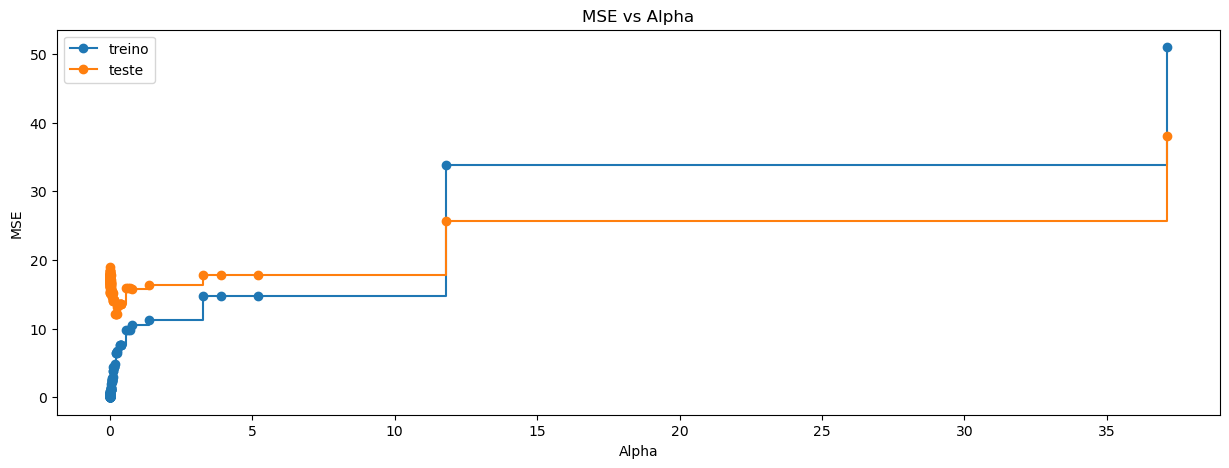

In [144]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas, train_scores, marker='o', drawstyle="steps-post", label='treino')
ax.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post", label='teste')
ax.legend()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title("MSE vs Alpha")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [146]:
arvore_final = DecisionTreeRegressor(ccp_alpha=0.01)
arvore_final.fit(X_train, y_train)

arvore_final.score(X_test, y_test)

0.7559484103795626

### 7. Visualize esta árvore.

[Text(0.4551850912778905, 0.9666666666666667, 'lstat <= 9.725\nsquared_error = 89.768\nsamples = 354\nvalue = 22.889'),
 Text(0.2669878296146045, 0.9, 'rm <= 7.454\nsquared_error = 84.092\nsamples = 156\nvalue = 29.904'),
 Text(0.16075050709939148, 0.8333333333333334, 'dis <= 1.485\nsquared_error = 45.389\nsamples = 134\nvalue = 27.372'),
 Text(0.1526369168356998, 0.7666666666666667, 'squared_error = 0.0\nsamples = 5\nvalue = 50.0'),
 Text(0.16886409736308317, 0.7666666666666667, 'rm <= 6.797\nsquared_error = 26.533\nsamples = 129\nvalue = 26.495'),
 Text(0.0436105476673428, 0.7, 'tax <= 208.0\nsquared_error = 9.963\nsamples = 90\nvalue = 23.952'),
 Text(0.016227180527383367, 0.6333333333333333, 'rm <= 6.354\nsquared_error = 6.296\nsamples = 3\nvalue = 32.933'),
 Text(0.008113590263691683, 0.5666666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 36.2'),
 Text(0.02434077079107505, 0.5666666666666667, 'squared_error = 1.44\nsamples = 2\nvalue = 31.3'),
 Text(0.07099391480730223, 0.

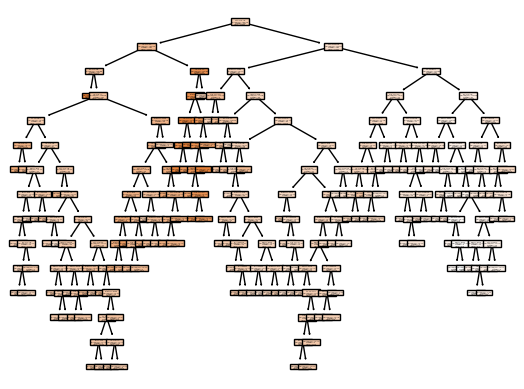

In [148]:
tree.plot_tree(arvore_final, feature_names=list(X.columns), filled=True)